In [1]:
#@title Imports
# !pip install -q symbulate
from symbulate import *

# !pip install tabulate
from tabulate import tabulate

import matplotlib.pyplot as plt
%matplotlib inline

# Handout 06: Likelihood Ratio Tests

## Exer 6.1

### a) Reject $H_0$ if $|\bar{X}-98.6|\ge c$, that is if $\bar{X} \le c_1$ or $\bar{X} \ge c_2$

In [2]:
n = 4

sigma = 1

mu0 = 98.6
mu1s = (mu0, 97.5, 99.0, 99.7)

alpha0 = 0.05

z0 = Normal(0, 1).quantile(1 - alpha0 / 2)

c1 = mu0 - z0 * sigma / sqrt(n)

c2 = mu0 + z0 * sigma / sqrt(n)

c1, c2

(97.62001800772997, 99.57998199227002)

### Power of test (a) if $\mu = 97.5$

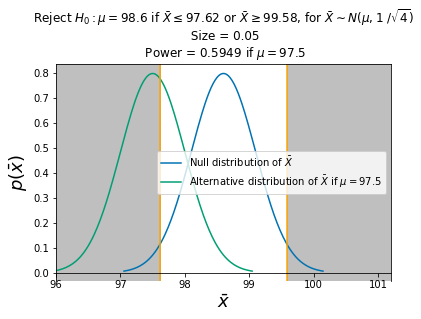

In [3]:
mu1 = 97.5

size = Normal(mu0, sigma / sqrt(n)).cdf(c1) + 1 - Normal(mu0, sigma / sqrt(n)).cdf(c2)
                   
power = Normal(mu1, sigma / sqrt(n)).cdf(c1) + 1 - Normal(mu1, sigma / sqrt(n)).cdf(c2)

Normal(mu0, sigma / sqrt(n)).plot()
Normal(mu1, sigma / sqrt(n)).plot()

plt.xlim(min(mu1s) - 3 * sigma / sqrt(n), max(mu1s) + 3 * sigma / sqrt(n))
plt.legend([r'Null distribution of $\bar{X}$',
            r'Alternative distribution of $\bar{X}$ if $\mu=%s$' % mu1]);
plt.axvline(x = c1, color = 'orange');
plt.axvline(x = c2, color = 'orange');
plt.axvspan(90, c1, alpha = 0.5, color = 'gray');
plt.axvspan(c2, 110, alpha = 0.5, color = 'gray');
plt.xlabel(r"$\bar{x}$", fontsize=18)
plt.ylabel(r"$p(\bar{x})$", fontsize=18);
plt.title(r"Reject $H_0:\mu =%s$" % mu0 +
          r" if $\bar{X}\leq %s$" % round(c1, 3) +
          r" or $\bar{X}\geq %s$" % round(c2, 3) +
          r", for $\bar{X}\sim N(\mu, %s$" % sigma +
          r" $/ \sqrt{%s}$)" % n + 
          "\n Size = %s" % round(size, 4) +
          "\n Power = %s" % round(power, 4) +
          r" if $\mu = %s$" % mu1);

### Power of test (a) if $\mu = 99.0$

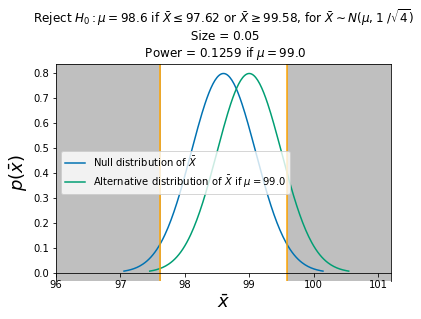

In [4]:
mu1 = 99.0

size = Normal(mu0, sigma / sqrt(n)).cdf(c1) + 1 - Normal(mu0, sigma / sqrt(n)).cdf(c2)
                   
power = Normal(mu1, sigma / sqrt(n)).cdf(c1) + 1 - Normal(mu1, sigma / sqrt(n)).cdf(c2)

Normal(mu0, sigma / sqrt(n)).plot()
Normal(mu1, sigma / sqrt(n)).plot()

plt.xlim(min(mu1s) - 3 * sigma / sqrt(n), max(mu1s) + 3 * sigma / sqrt(n))
plt.legend([r'Null distribution of $\bar{X}$',
            r'Alternative distribution of $\bar{X}$ if $\mu=%s$' % mu1]);
plt.axvline(x = c1, color = 'orange');
plt.axvline(x = c2, color = 'orange');
plt.axvspan(90, c1, alpha = 0.5, color = 'gray');
plt.axvspan(c2, 110, alpha = 0.5, color = 'gray');
plt.xlabel(r"$\bar{x}$", fontsize=18)
plt.ylabel(r"$p(\bar{x})$", fontsize=18);
plt.title(r"Reject $H_0:\mu =%s$" % mu0 +
          r" if $\bar{X}\leq %s$" % round(c1, 3) +
          r" or $\bar{X}\geq %s$" % round(c2, 3) +
          r", for $\bar{X}\sim N(\mu, %s$" % sigma +
          r" $/ \sqrt{%s}$)" % n + 
          "\n Size = %s" % round(size, 4) +
          "\n Power = %s" % round(power, 4) +
          r" if $\mu = %s$" % mu1);

### Power function of Test (a)

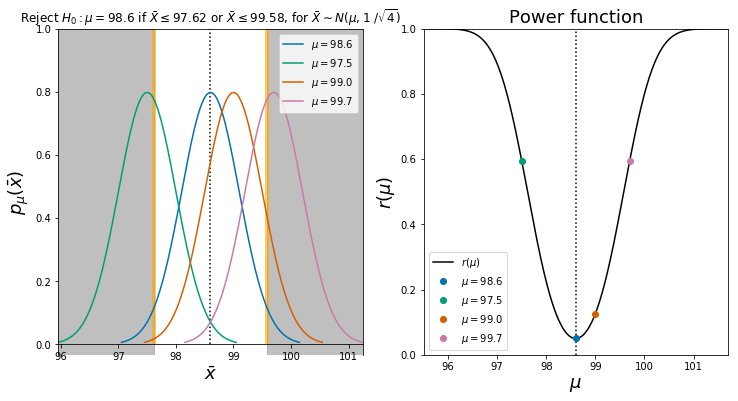

In [5]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

axes[0].set_xlim(min(mu1s) - 3 * sigma / sqrt(n),
                 max(mu1s) + 3 * sigma / sqrt(n))

axes[1].set_ylim(0, 1)
axes[1].set_xlim(min(mu1s) - 4 * sigma / sqrt(n), max(mu1s) + 4 * sigma / sqrt(n))
mus = np.linspace(min(mu1s) - 4 * sigma / sqrt(n), max(mu1s) + 4 * sigma / sqrt(n), 1000)
rA = [Normal(mu, sigma / sqrt(n)).cdf(c1) + 1 - Normal(mu, sigma / sqrt(n)).cdf(c2) for mu in mus]
axes[1].plot(mus, rA, "k-")

for mu in mu1s:
    Normal(mu, sigma / sqrt(n)).plot(ax=axes[0])
    axes[1].plot([mu],
                 Normal(mu, sigma / sqrt(n)).cdf(c1) + 1 - Normal(mu, sigma / sqrt(n)).cdf(c2),
                 'o')

axes[0].vlines(c1, 0, 1, color = 'orange', alpha=.6, linewidth=4)
axes[0].vlines(c2, 0, 1, color = 'orange', alpha=.6, linewidth=4)
axes[0].vlines(mu0, 0, 1, color = 'black', linestyle="dotted")
axes[0].axvspan(90, c1, alpha = 0.5, color = 'gray');
axes[0].axvspan(c2, 110, alpha = 0.5, color = 'gray');
axes[1].vlines(mu0, 0, 1, color = 'black', linestyle="dotted")


axes[0].legend([r"$\mu=%s$" % mu for mu in mu1s])
axes[1].legend([r"$r(\mu)$"] + [r"$\mu=%s$" % mu for mu in mu1s])

axes[0].set_xlabel(r"$\bar{x}$", fontsize=18)
axes[0].set_ylabel(r"$p_\mu(\bar{x})$", fontsize=18)
axes[1].set_xlabel(r"$\mu$", fontsize=18)
axes[1].set_ylabel(r"$r(\mu)$", fontsize=18);

axes[0].set_title(r"Reject $H_0:\mu =%s$" % round(mu0, 3) +
          r" if $\bar{X}\leq %s$" % round(c1, 3) +
            r" or $\bar{X}\leq %s$" % round(c2, 3) +
          r", for $\bar{X}\sim N(\mu, %s$" % sigma +
          r" $/ \sqrt{%s}$)" % n );
axes[1].set_title(r"Power function", fontsize=18);

### b) Reject $H_0$ if $\bar{X} \le c$

In [6]:
cB = Normal(mu0, sigma / sqrt(n)).quantile(alpha0)

cB

97.77757318652426

### Power of test (b) if $\mu = 97.5$

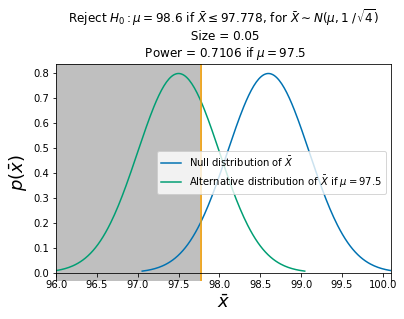

In [7]:
mu1 = 97.5

size = Normal(mu0, sigma / sqrt(n)).cdf(cB)
power = Normal(mu1, sigma / sqrt(n)).cdf(cB)

Normal(mu0, sigma / sqrt(n)).plot()
Normal(mu1, sigma / sqrt(n)).plot()

plt.xlim(mu1 - 3 * sigma / sqrt(n), mu0 + 3 * sigma / sqrt(n))
plt.legend([r'Null distribution of $\bar{X}$',
            r'Alternative distribution of $\bar{X}$ if $\mu=%s$' % mu1]);
plt.axvline(x = cB, color = 'orange');
plt.axvspan(90, cB, alpha = 0.5, color = 'gray');
plt.xlabel(r"$\bar{x}$", fontsize=18)
plt.ylabel(r"$p(\bar{x})$", fontsize=18);
plt.title(r"Reject $H_0:\mu =%s$" % mu0 +
          r" if $\bar{X}\leq %s$" % round(cB, 3) +
          r", for $\bar{X}\sim N(\mu, %s$" % sigma +
          r" $/ \sqrt{%s}$)" % n + 
          "\n Size = %s" % round(size, 4) +
          "\n Power = %s" % round(power, 4) +
          r" if $\mu = %s$" % mu1);

### Power of test (b) if $\mu = 99.0$

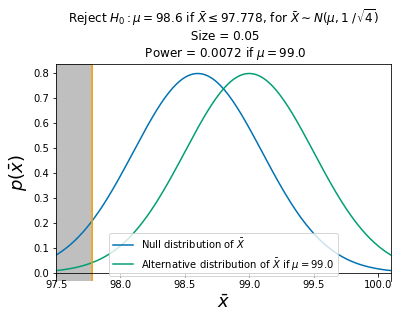

In [8]:
mu1 = 99.0

size = Normal(mu0, sigma / sqrt(n)).cdf(cB)
power = Normal(mu1, sigma / sqrt(n)).cdf(cB)

Normal(mu0, sigma / sqrt(n)).plot()
Normal(mu1, sigma / sqrt(n)).plot()

plt.xlim(mu1 - 3 * sigma / sqrt(n), mu0 + 3 * sigma / sqrt(n))
plt.legend([r'Null distribution of $\bar{X}$',
            r'Alternative distribution of $\bar{X}$ if $\mu=%s$' % mu1]);
plt.axvline(x = cB, color = 'orange');
plt.axvspan(90, cB, alpha = 0.5, color = 'gray');
plt.xlabel(r"$\bar{x}$", fontsize=18)
plt.ylabel(r"$p(\bar{x})$", fontsize=18);
plt.title(r"Reject $H_0:\mu =%s$" % mu0 +
          r" if $\bar{X}\leq %s$" % round(cB, 3) +
          r", for $\bar{X}\sim N(\mu, %s$" % sigma +
          r" $/ \sqrt{%s}$)" % n + 
          "\n Size = %s" % round(size, 4) +
          "\n Power = %s" % round(power, 4) +
          r" if $\mu = %s$" % mu1);

### Power function of test (b)

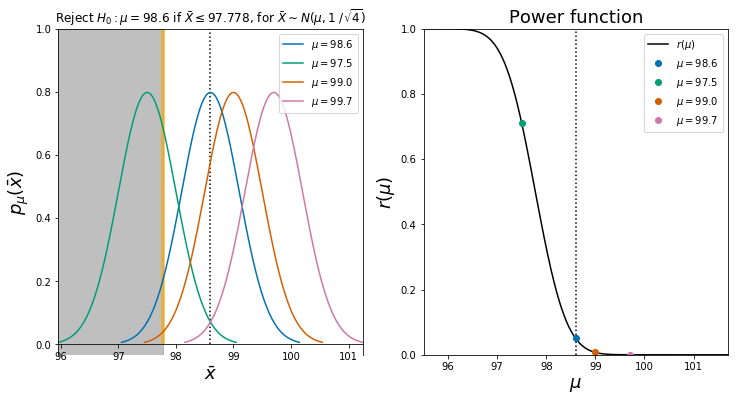

In [9]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

axes[0].set_xlim(min(mu1s) - 3 * sigma / sqrt(n),
                 max(mu1s) + 3 * sigma / sqrt(n))

axes[1].set_ylim(0, 1)
axes[1].set_xlim(min(mu1s) - 4 * sigma / sqrt(n), max(mu1s) + 4 * sigma / sqrt(n))
mus = np.linspace(min(mu1s) - 4 * sigma / sqrt(n), max(mu1s) + 4 * sigma / sqrt(n), 1000)
rB = [Normal(mu, sigma / sqrt(n)).cdf(cB) for mu in mus]
axes[1].plot(mus, rB, "k-")

for mu in mu1s:
    Normal(mu, sigma / sqrt(n)).plot(ax=axes[0])
    axes[1].plot([mu],
                 Normal(mu, sigma / sqrt(n)).cdf(cB),
                 'o')

axes[0].vlines(cB, 0, 1, color = 'orange', alpha=.6, linewidth=4)
axes[0].vlines(mu0, 0, 1, color = 'black', linestyle="dotted")
axes[0].axvspan(90, cB, alpha = 0.5, color = 'gray');
axes[1].vlines(mu0, 0, 1, color = 'black', linestyle="dotted")


axes[0].legend([r"$\mu=%s$" % mu for mu in mu1s])
axes[1].legend([r"$r(\mu)$"] + [r"$\mu=%s$" % mu for mu in mu1s])

axes[0].set_xlabel(r"$\bar{x}$", fontsize=18)
axes[0].set_ylabel(r"$p_\mu(\bar{x})$", fontsize=18)
axes[1].set_xlabel(r"$\mu$", fontsize=18)
axes[1].set_ylabel(r"$r(\mu)$", fontsize=18);

axes[0].set_title(r"Reject $H_0:\mu =%s$" % round(mu0, 3) +
          r" if $\bar{X}\leq %s$" % round(cB, 3) +
          r", for $\bar{X}\sim N(\mu, %s$" % sigma +
          r" $/ \sqrt{%s}$)" % n );
axes[1].set_title(r"Power function", fontsize=18);

### Power function of test (c): Reject $H_0$ if $\bar{X} \ge c$

In [10]:
cC = Normal(mu0, sigma / sqrt(n)).quantile(1 - alpha0)
cC

99.42242681347572

In [11]:
1 - Normal(97.5, sigma / sqrt(n)).cdf(cC)

6.031220936919546e-05

In [12]:
1 - Normal(99.0, sigma / sqrt(n)).cdf(cC)

0.19909628433143656

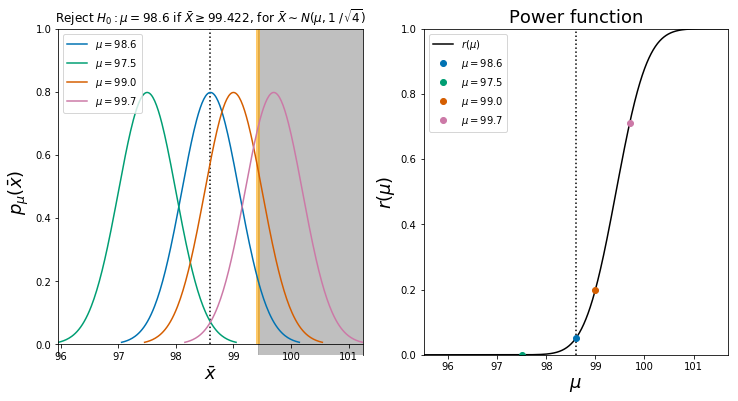

In [13]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

axes[0].set_xlim(min(mu1s) - 3 * sigma / sqrt(n),
                 max(mu1s) + 3 * sigma / sqrt(n))

axes[1].set_ylim(0, 1)
axes[1].set_xlim(min(mu1s) - 4 * sigma / sqrt(n), max(mu1s) + 4 * sigma / sqrt(n))
mus = np.linspace(min(mu1s) - 4 * sigma / sqrt(n), max(mu1s) + 4 * sigma / sqrt(n), 1000)
rC = [1 - Normal(mu, sigma / sqrt(n)).cdf(cC) for mu in mus]
axes[1].plot(mus, rC, "k-")

for mu in mu1s:
    Normal(mu, sigma / sqrt(n)).plot(ax=axes[0])
    axes[1].plot([mu],
                 1 - Normal(mu, sigma / sqrt(n)).cdf(cC),
                 'o')

axes[0].vlines(cC, 0, 1, color = 'orange', alpha=.6, linewidth=4)
axes[0].vlines(mu0, 0, 1, color = 'black', linestyle="dotted")
axes[0].axvspan(cC, 110, alpha = 0.5, color = 'gray');
axes[1].vlines(mu0, 0, 1, color = 'black', linestyle="dotted")


axes[0].legend([r"$\mu=%s$" % mu for mu in mu1s])
axes[1].legend([r"$r(\mu)$"] + [r"$\mu=%s$" % mu for mu in mu1s])

axes[0].set_xlabel(r"$\bar{x}$", fontsize=18)
axes[0].set_ylabel(r"$p_\mu(\bar{x})$", fontsize=18)
axes[1].set_xlabel(r"$\mu$", fontsize=18)
axes[1].set_ylabel(r"$r(\mu)$", fontsize=18);

axes[0].set_title(r"Reject $H_0:\mu =%s$" % round(mu0, 3) +
          r" if $\bar{X}\geq %s$" % round(cC, 3) +
          r", for $\bar{X}\sim N(\mu, %s$" % sigma +
          r" $/ \sqrt{%s}$)" % n );
axes[1].set_title(r"Power function", fontsize=18);

### Comparison of power functions

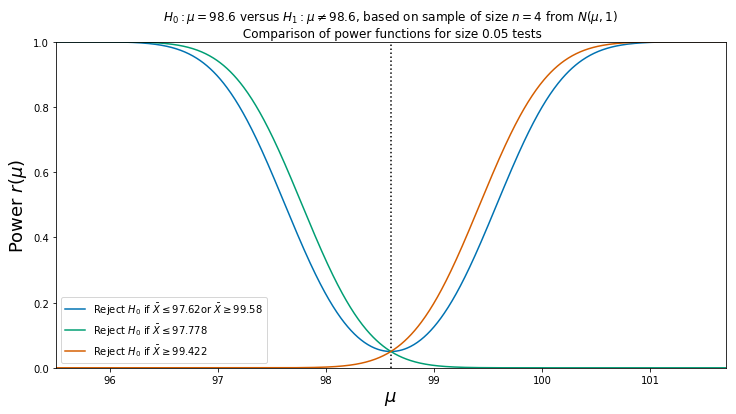

In [14]:
fig, axes = plt.subplots(1, 1, figsize=(12, 6))

axes.set_ylim(0, 1)
axes.set_xlim(min(mu1s) - 4 * sigma / sqrt(n), max(mu1s) + 4 * sigma / sqrt(n))
axes.plot(mus, rA, "-")
axes.plot(mus, rB, "-")
axes.plot(mus, rC, "-")
axes.vlines(mu0, 0, 1, color = 'black', linestyle="dotted")
axes.legend([r"Reject $H_0$ if $\bar{X}\leq %s$" % round(c1, 3) +
             r"or $\bar{X}\geq %s$" % round(c2, 3),
             r"Reject $H_0$ if $\bar{X}\leq %s$" % round(cB, 3),
             r"Reject $H_0$ if $\bar{X}\geq %s$" % round(cC, 3)])
axes.set_xlabel(r"$\mu$", fontsize=18)
axes.set_ylabel(r"Power $r(\mu)$", fontsize=18)
axes.set_title(r"$H_0: \mu =%s$" % round(mu0, 3) +
          r" versus $H_1:\mu \neq %s$" % round(mu0, 3) +
          r", based on sample of size $n=%s$" % n +
          r" from $N(\mu, %s)$" % sigma +
          "\n Comparison of power functions for size %s tests" % alpha0);





## Exer 6.4

In [15]:
x = [97.5, 97.6, 97.8, 97.9]
mu_mle = mean(x)

n = 4
sigma = 1

### Likelihood under $H_0$

In [16]:
mu0 = 98.6
Lambda_num = Normal(mu0, sigma).pdf(97.5) * Normal(mu0, sigma).pdf(97.6) * Normal(mu0, sigma).pdf(97.8) * Normal(mu0, sigma).pdf(97.9) 
Lambda_num

0.00476835387692875

### Maximum Likelihood

In [17]:
Lambda_den = Normal(mu_mle, sigma).pdf(97.5) * Normal(mu_mle, sigma).pdf(97.6) * Normal(mu_mle, sigma).pdf(97.8) * Normal(mu_mle, sigma).pdf(97.9) 
Lambda_den

0.024094922801458002

### Value of LRT for this sample

In [18]:
Lambda_num / Lambda_den

0.19789869908361826

### Based on $\bar{X}$, sufficient statistic

In [19]:
Normal(mu0, sigma / sqrt(n)).pdf(mean(x)) / Normal(mu_mle, sigma / sqrt(n)).pdf(mean(x))

0.19789869908361066

### Null distribution of $-2\log\Lambda$

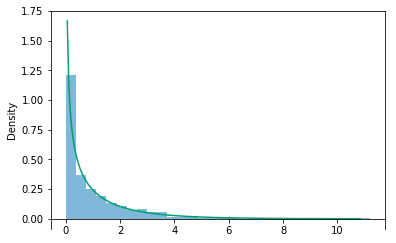

In [20]:
mu0 = 98.6
sigma = 1
n = 4

from numpy import prod

def L0(x):
    return prod([Normal(mu0, sigma).pdf(xi) for xi in x])

def Lmax(x):
    return prod([Normal(mean(x), sigma).pdf(xi) for xi in x])


P0 = Normal(mu0, sigma) ** n
Lambda_num = RV(P0, L0)
Lambda_den = RV(P0, Lmax)
Lambda = Lambda_num / Lambda_den

(-2 * log(Lambda)).sim(1000).plot()
ChiSquare(1).plot()

In [21]:
ChiSquare(1).quantile(1 - 0.05)

3.841458820694124